# Scikit-Learn Notebook

### Overview of scikit-learn python library

What is scikit-learn? Well based on scikit-learn.org page, scikit-learn is a "simple and effiecient tools for predictive data analysis".  It is a free and open-source machine learning library, that supports both supervised learning algorithms and unsupervised learning algorithms. Scikit library is mostly written in Pythom, and uses NumPy for linear algebra and array operations. In my notebook I will be going through 3 scikit learn algorithms.

# 1. Algorithm 
### Recognizing hand-writteb digits with scikit-learn classification algorithm

My first scikit-learn's examplar algorithm will be a classification algorithm, using the svm classifier(support vector machine). This example shows how scikit-learn's classification algorithm can be used to recognize images of hand-written digits, from 0-9.

> In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. ~ [Machine Learning Mastery](https://machinelearningmastery.com/types-of-classification-in-machine-learning/)



##### Steps I used to code up the classification algorithm to recognize hand-writteb digits 

1. Import require packages
 - We need to import the following from the sklearn package: datasets, metrics, svm, model_selection.train_test_split
 - You can use a different classifier like (KNeighborsClassifier) but for my example I'll be using the svm
 - I also imported matplotlib.pyplot to display a selection of the hand-written data.

 
2. Load/Create dataset  
 - scikit-learn has various sample dataset for the different algorithm.
 - Example Boston house prices dataset(contains varies data on Boston houseing from 1978 based on 'Hedonic prices and the demand for clean air'), Optical recognition of handwritten digits dataset(contains images of hand-written digits). 
 - For this algorithm we will be using the optical recognition of handwritten digits dataset. Click [here](https://scikit-learn.org/stable/datasets/toy_dataset.html) for more details on the examplar dataset scikit-learn uses.

3. Flatten the images
 - Currently each images in the dataset are a 2-D array of grayscale values (8, 8). 8,8 means that the values of the image's in arrays consist of 8 dimensions, and each dimension has 8 elements. Example array dimesion[0-7] = [1,2,3,4,5,6,7,8]
 - We need to convert each images array dimension to a singular array dimesion with 64 elements. So rather then each images having a (8,8) array they will have a singular array of 64 element.
 - We then create a new dataset for just the images value (n_samples, n_features). Where n_samples is the number of images in the dataset and n_features is the total number of pixels in each image (the reshaped singualr array)

4. Create a classifier 
 - The classifier we use is from the svm (support vector machine) module. 
 - The svc (support vector classifier).
 - I'm using the default parameter. To learn more about the parameter click [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#).
 
5. Split the data into train and test subsets
 - We do this using the train_test_split() function from sklearn.model_selection module
 - The parameter we are interested in for the train_test_split() function are arrays(arrays*: the array we want to split), test_size/train_size (float: represent the proportion of the dataset to include in the test/train split), and shuffle(Bool: whether or not to shuffle the data before splitting)
 - Arrays: the arrays I want to split are the dataset containing the flatten images, and the images labels
 - Test_size/train_size: valued between 0 - 1.0. It the fraction of the array we want as test and train. Only need to set 
 - The train value will be the values that that is fitted in the classifier, whereas the test valuies are used for predictions. 

6. Fit the train samples in the svc
 - Do this by calling the svc.fit() function
 - the fit parameter takes in the train values: .fit(x_train, y_train)
 

7. Finally use the fitted classifier to predict the value of the test subset
 - Do this by calling svc.predict() funcction
 - the predict function's parameter takes in the test values: .predict(x_test)



In [1]:
# 1. Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# 2. Load digit is a sample dataset, now stored in digi variable
digi = datasets.load_digits()


print("The size of Load Digit dataset is %i " % len(digi))
print("The dataset contains the following Data, target, target_names, frame, feature_names, images, DESC")

The size of Load Digit dataset is 7 
The dataset contains the following Data, target, target_names, frame, feature_names, images, DESC


In [3]:
# 3. flatten the images
n_samples = len(digi.images)
data = digi.images.reshape((n_samples, -1))

print("New shape of load_digits() images data " )
print(data.shape)

New shape of load_digits() images data 
(1797, 64)


In [4]:
# 4. Create a classifier: a support vector classifier
clf = svm.SVC()


In [5]:
# 5. Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digi.target, test_size=0.5, shuffle=False)

4 of the values fitted in the classifiers


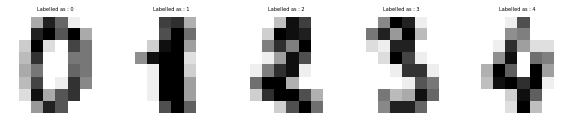

In [6]:
# 6. Learn the digits on the train subset
clf.fit(X_train, y_train)

# Value fitted in the classifiers  

print('4 of the values fitted in the classifiers')
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, y_train ):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Labelled as : %i' % label,  fontsize = 5)

0.9610678531701891
The total number of correctly predicted value is: 864 out of 899 datas 




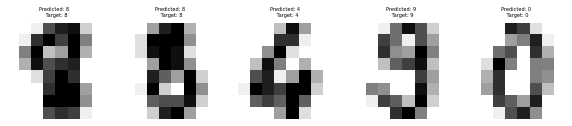

In [7]:
# 7. Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
#Kprediction = Kclf.predict(X_test)



_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label, target in zip(axes, X_test, predicted, y_test ):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Predicted: %i \n Target: %i' % (label, target),  fontsize = 5)

    


# Predictions analyzes
# This returns a fraction in decimals of the correctly of samples
print(metrics.accuracy_score(predicted, y_test))
#print(metrics.accuracy_score(KNN_prediction, y_test))

print('The total number of correctly predicted value is: %d out of %d datas \n\n' % (metrics.accuracy_score(predicted, y_test, normalize = False),  len(y_test)))



### Classifcaion report

In [35]:
print(metrics.classification_report(predicted, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.97      0.97      0.97        91
           2       0.98      1.00      0.99        84
           3       0.87      0.98      0.92        81
           4       0.96      0.99      0.97        89
           5       0.97      0.93      0.95        95
           6       0.99      0.99      0.99        91
           7       0.99      0.95      0.97        93
           8       0.95      0.92      0.94        91
           9       0.96      0.92      0.94        96

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



Above we have the report of the prediction for the examplar dataset 

> "***Precision*** is defined as the fraction of relevant instances among all retrieved instances. ***Recall***, sometimes referred to as ‘sensitivity, is the fraction of retrieved instances among all relevant instances. A perfect classifier has precision and recall both equal to 1." ~ [DeepAI](https://deepai.org/machine-learning-glossary-and-terms/precision-and-recall)


Precision - in terms of scikit-learn, the precision value resulted from the classifier correctly identify a sample data as positive or negative. <br/>
Recall - in terms of scikit-learn, the recall value result from the classifier idemtiying all the positive sample. <br/>
F1-score - the harmonic means of recall and precision. The highest possible value to get is a 1, which is a perfect value and the lowest possible value is 0. 1 indicates a that the precision and recall both have  a value of 1 and 0 indicates either recall/precision have a 0 value. 
<br/>







# 2. Algorithm 
### Automatic grouping of similar objects into sets using SciKit-Learn's clustering algorithm.

> Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data analysis, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning. ~ [Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)


##### Run down of code below


1. Import require packages
 - sklearn.datasets
 - pandas
 - matplotlib.pyplot
 
2. Load/Create dataset  
 - Using Iris dataset
 

3. Implement the FeatureAgglomeration method
 - it implements the hierarchical clustering algorithm 
 - this method also applys a transform method that is used to reduce similar features
 - this result in the reduction in numbers of features

4. Fit and transform the data onto the cluster

5. Plot on graph


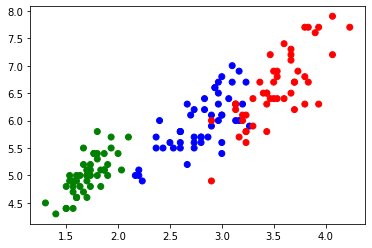

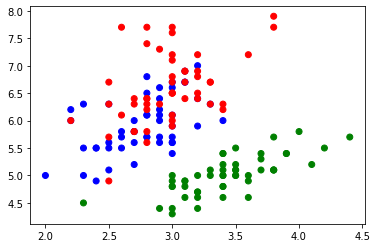

In [12]:
### from sklearn.cluster import FeatureAgglomeration
from sklearn import datasets
from sklearn.cluster import FeatureAgglomeration
import pandas as pd
import matplotlib.pyplot as plt


# 2.Load/Create dataset  
iris = datasets.load_iris()

data = iris.data


# 3. Implement the FeatureAgglomeration method
agglo=FeatureAgglomeration(n_clusters=2);

# 4. Fitting the data
X = agglo.fit_transform(data);


# 5. Plotting
color=[]
for i in range (len(data)):
    if i <= 49 :
        color.append('g')
    if  (i >= 50 and i <=99):
        color.append('b')
    if i >= 100 :
        color.append('r')
plt.scatter(X[:,0],X[:,1],c=color)
plt.show()

plt.scatter(data[:,1], data[:,0], c=color)
plt.show()


# 3. Algorithm 


### Using a survey dataset to predict the popularity of dance music depending with SciKit Learn's regression algoritm. PoissonRegressor 




In [42]:
#Import 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics


survey_Response = pd.read_csv("./datasets/responses.csv")

print(survey_Response.Dance.shape)


dance_Response = survey_Response.Dance[:-807]
age = survey_Response.Age[:-807]


dance_Response.shape
age.shape

#print(age)
dataset = pd.DataFrame({'Age' : age.array, 'Dance rating' : dance_Response.array})
dataset.shape

#Removing all null value from daataset
print(dataset.isnull().values.any())
dataset = dataset.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

#Check if theie is any null value - false means no
dataset.isnull().values.any()




(1010,)
203
True


False

In [214]:
train,test=train_test_split(dataset, train_size = .8,random_state =1)



In [215]:
# defining X and y for model training and test
X_train = train.Age.values.reshape(-1, 1)
y_train = train['Dance rating']

print(X_train.shape)
print(y_train.shape)


X_test = test.Age.values.reshape(-1, 1)
y_test = test['Dance rating']

print(X_test.shape)
print(y_test.shape)

(160, 1)
(160,)
(40, 1)
(40,)


In [216]:
pipeline_Model = Pipeline([('model', PoissonRegressor())])
pipeline_Model.fit(X_train, y_train)
predicted_Test = pipeline_Model.predict(X_test)
r2_test = metrics.r2_score(y_test, y_pred)

r2_test

-0.00733738064698608

In [217]:
predicted_Train = pipeline_Model.predict(X_train)
r2_train = metrics.r2_score(y_train, predicted_Train)
r2_train

0.0001271093092529707

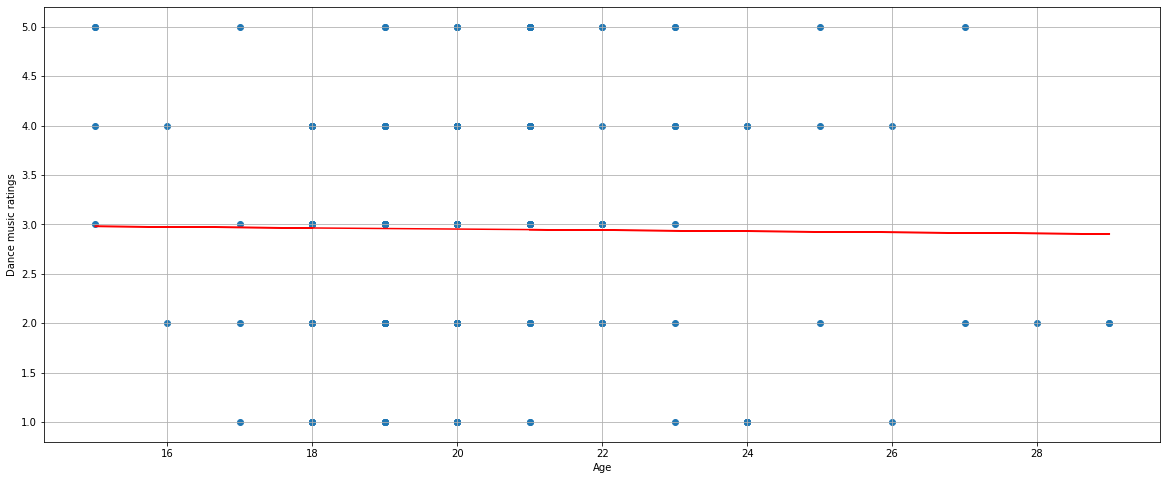

In [218]:

fig, ax = plt.subplots(figsize=(20,8))
plt.grid()
ax.set_ylabel("Dance music ratings")                                
ax.set_xlabel("Age")
# train data in blue
ax.scatter(X_train, y_train)
ax.plot(X_train, predicted_Train, color='red')

plt.show()